In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
%reload_ext watermark
%watermark -a "VictorRP7"

Author: VictorRP7



In [3]:
df_dados = pd.read_csv("dataset.csv")

In [4]:
df_dados.head()

,id,data_lancamento,conta_debito,conta_credito,valor,documento,natureza_operacao,centro_custo,impostos,moeda,taxa_conversao
0,1,2022-02-27,DWAVRL,CIOVQ6,5533.25,DOCPAXGQ,OP7JDVK,CC5FYA2,444.13252,NaN,3.475606
1,2,2022-05-11,D8TF53,CV9Y0V,7180.37,DOCBXZXG,OPXSY64,CCLH4R9,471.09236,EUR,3.523287
2,3,2020-03-23,D0TZCE,CELQSH,6067.36,DOCF5ITC,OPTDE9B,CCDG8CJ,326.49988,JPY,3.523287
3,4,2021-06-14,DOGLK7,CDFEMS,5494.34,DOCZRS1U,NaN,CC98G2K,471.09236,JPY,3.523287
4,5,2022-11-13,DHL0I5,CRU97G,4294.18,NaN,OP62LG1,CCZD80Y,154.26398,EUR,3.523287


In [5]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1200 non-null   int64  
 1   data_lancamento    1200 non-null   object 
 2   conta_debito       1200 non-null   object 
 3   conta_credito      1200 non-null   object 
 4   valor              1200 non-null   float64
 5   documento          1078 non-null   object 
 6   natureza_operacao  1080 non-null   object 
 7   centro_custo       1200 non-null   object 
 8   impostos           1020 non-null   float64
 9   moeda              947 non-null    object 
 10  taxa_conversao     982 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 103.3+ KB


In [6]:
df_dados.isna().sum()

id                     0
data_lancamento        0
conta_debito           0
conta_credito          0
valor                  0
documento            122
natureza_operacao    120
centro_custo           0
impostos             180
moeda                253
taxa_conversao       218
dtype: int64

In [7]:
valores_ausentes = df_dados.isna().sum()
total_linhas = len(df_dados)
proporcao_valores_ausentes = valores_ausentes / total_linhas
print(proporcao_valores_ausentes)

id                   0.000000
data_lancamento      0.000000
conta_debito         0.000000
conta_credito        0.000000
valor                0.000000
documento            0.101667
natureza_operacao    0.100000
centro_custo         0.000000
impostos             0.150000
moeda                0.210833
taxa_conversao       0.181667
dtype: float64


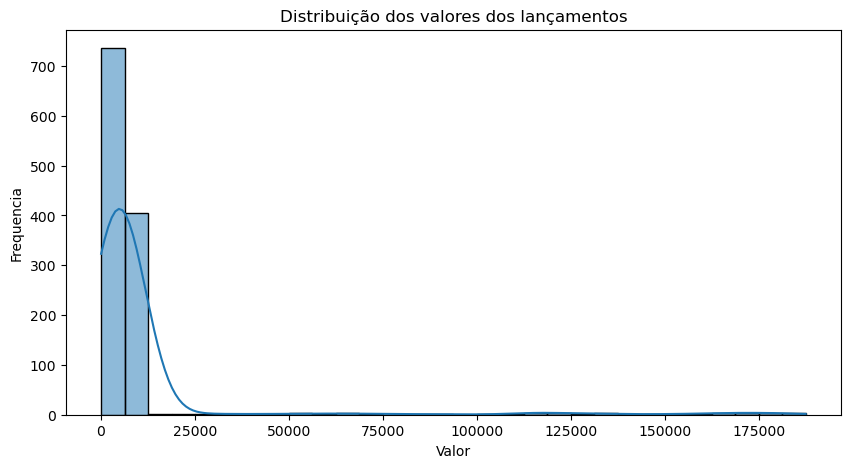

In [8]:
#distribuicao dos valores dos lancamentos
plt.figure(figsize=(10,5))
sns.histplot(df_dados['valor'], kde = True, bins = 30)
plt.title('Distribuição dos valores dos lançamentos')
plt.xlabel('Valor')
plt.ylabel('Frequencia')
plt.show()

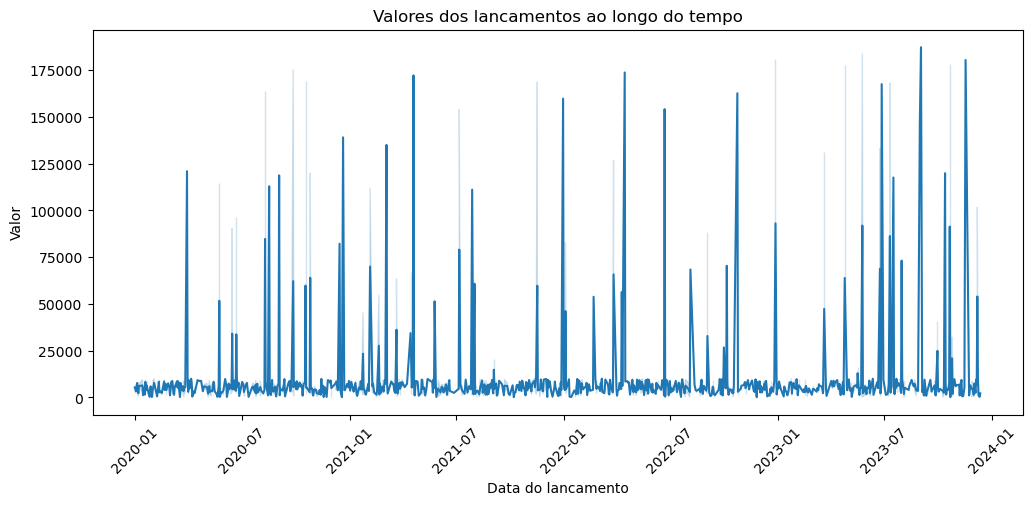

In [9]:
#valores dos lancamentos ao longo do tempo
plt.figure(figsize=(12,5))
df_dados['data_lancamento'] = pd.to_datetime(df_dados['data_lancamento'])
sns.lineplot(x = 'data_lancamento', y = 'valor', data = df_dados)
plt.title('Valores dos lancamentos ao longo do tempo')
plt.xlabel('Data do lancamento')
plt.ylabel('Valor')
plt.xticks(rotation = 45)
plt.show()

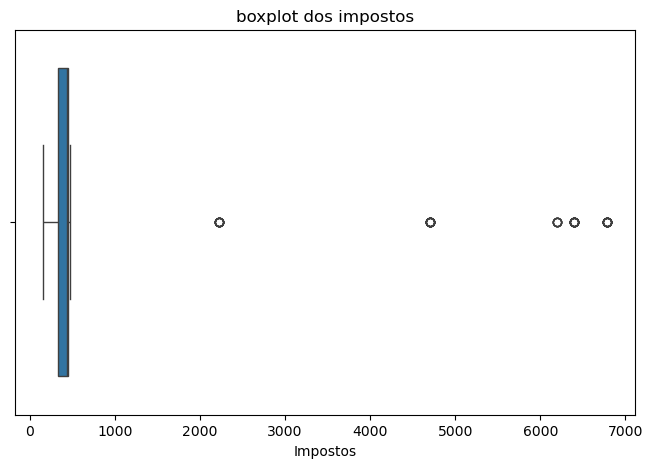

In [10]:
#boxplot dos impostos
plt.figure(figsize=(8,5))
sns.boxplot(x = df_dados['impostos'])
plt.title('boxplot dos impostos')
plt.xlabel('Impostos')
plt.show()

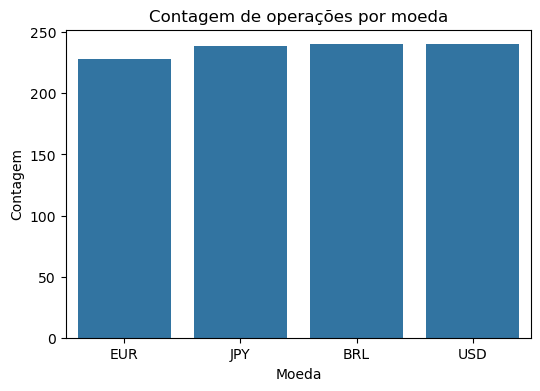

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'moeda', data = df_dados)
plt.title('Contagem de operações por moeda')
plt.xlabel('Moeda')
plt.ylabel('Contagem')
plt.show()

In [12]:
df_dados['impostos'].isna().sum()

180

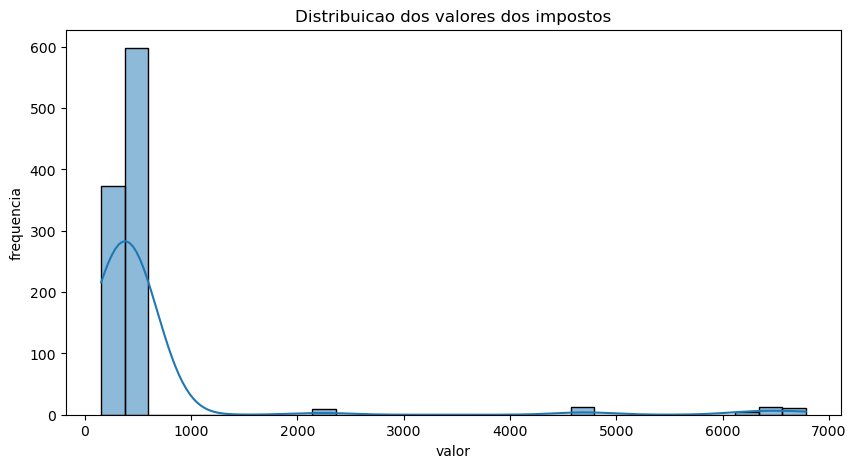

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df_dados['impostos'], kde = True, bins = 30)
plt.title('Distribuicao dos valores dos impostos')
plt.xlabel('valor')
plt.ylabel('frequencia')
plt.show()

In [14]:
df_dados['impostos'].fillna(df_dados['impostos'].median(), inplace = True)

In [15]:
df_dados['impostos'].isna().sum()

0

In [16]:
df_dados['moeda'].fillna(df_dados['moeda'].mode()[0], inplace = True)

In [17]:
df_dados['moeda'].isna().sum()

0

In [18]:
df_dados['taxa_conversao'].fillna(method = 'bfill', inplace = True)

In [19]:
df_dados['documento'].fillna(method = 'bfill', inplace = True)

In [20]:
df_dados['natureza_operacao'].fillna(method = 'bfill', inplace = True)

In [21]:
valores_ausentes = df_dados.isna().sum()
total_linhas = len(df_dados)
proporcao_valores_ausentes = valores_ausentes / total_linhas
print(proporcao_valores_ausentes)

id                   0.0
data_lancamento      0.0
conta_debito         0.0
conta_credito        0.0
valor                0.0
documento            0.0
natureza_operacao    0.0
centro_custo         0.0
impostos             0.0
moeda                0.0
taxa_conversao       0.0
dtype: float64


In [22]:
tem_valor_pergunta = df_dados['conta_credito'].isin(['?']).any()
print(tem_valor_pergunta)

True


In [23]:
contagem_valores = df_dados['conta_credito'].value_counts()
numero_ocorrencias_pergunta = contagem_valores.get('?',0)
print(numero_ocorrencias_pergunta)


4


In [24]:
coluas_categoricas = df_dados.select_dtypes(include = ['object', 'category']).columns
for coluna in coluas_categoricas:
    tem_valor_pergunta = df_dados[coluna].isin(['?']).any()
    print(f"A coluna  '{coluna}'contem '?'? {tem_valor_pergunta}")

A coluna  'conta_debito'contem '?'? False
A coluna  'conta_credito'contem '?'? True
A coluna  'documento'contem '?'? False
A coluna  'natureza_operacao'contem '?'? False
A coluna  'centro_custo'contem '?'? False
A coluna  'moeda'contem '?'? False


In [25]:
df_dados['conta_credito'].replace('?', np.nan, inplace = True)
df_dados['conta_credito'].fillna(method= 'ffill', inplace = True)

In [26]:
df_dados['conta_credito'].isna().sum()

0

In [27]:
df_dados.isna().sum()

id                   0
data_lancamento      0
conta_debito         0
conta_credito        0
valor                0
documento            0
natureza_operacao    0
centro_custo         0
impostos             0
moeda                0
taxa_conversao       0
dtype: int64

In [28]:
# Tratamento de outliers na variável valor

# Calculando Q1 e Q3
Q1 = df_dados['valor'].quantile(0.25)
Q3 = df_dados['valor'].quantile(0.75)

# Calculando IQR
IQR = Q3 - Q1

# Definindo limites para determinar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando os outliers
df_filtrado_1 = df_dados[~((df_dados['valor'] < limite_inferior) | (df_dados['valor'] > limite_superior))]

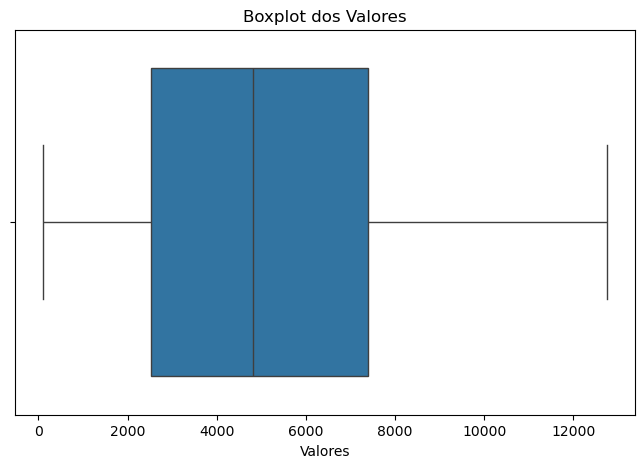

In [29]:
plt.figure(figsize = (8, 5))
sns.boxplot(x = df_filtrado_1['valor'])
plt.title('Boxplot dos Valores')
plt.xlabel('Valores')
plt.show()

In [30]:
# Tratamento de outliers na variável impostos

# Calculando Q1 e Q3
Q1 = df_dados['impostos'].quantile(0.25)
Q3 = df_dados['impostos'].quantile(0.75)

# Calculando IQR
IQR = Q3 - Q1

# Definindo limites para determinar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando os outliers
df_filtrado_2 = df_filtrado_1[~((df_filtrado_1['impostos'] < limite_inferior) | (df_filtrado_1['impostos'] > limite_superior))]

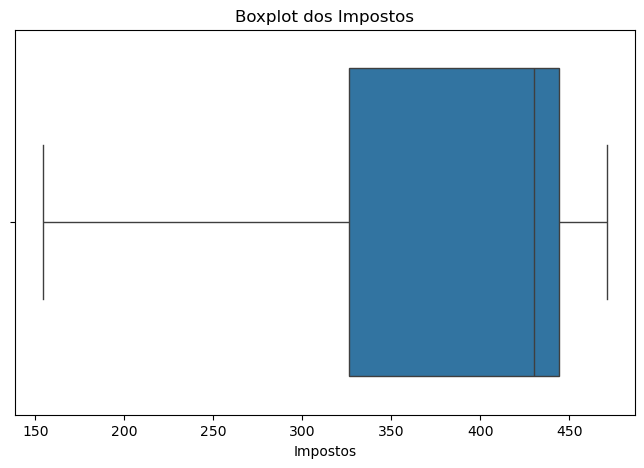

In [31]:
plt.figure(figsize = (8, 5))
sns.boxplot(x = df_filtrado_2['impostos'])
plt.title('Boxplot dos Impostos')
plt.xlabel('Impostos')
plt.show()

In [32]:
df_filtrado_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1097 non-null   int64         
 1   data_lancamento    1097 non-null   datetime64[ns]
 2   conta_debito       1097 non-null   object        
 3   conta_credito      1097 non-null   object        
 4   valor              1097 non-null   float64       
 5   documento          1097 non-null   object        
 6   natureza_operacao  1097 non-null   object        
 7   centro_custo       1097 non-null   object        
 8   impostos           1097 non-null   float64       
 9   moeda              1097 non-null   object        
 10  taxa_conversao     1097 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 102.8+ KB


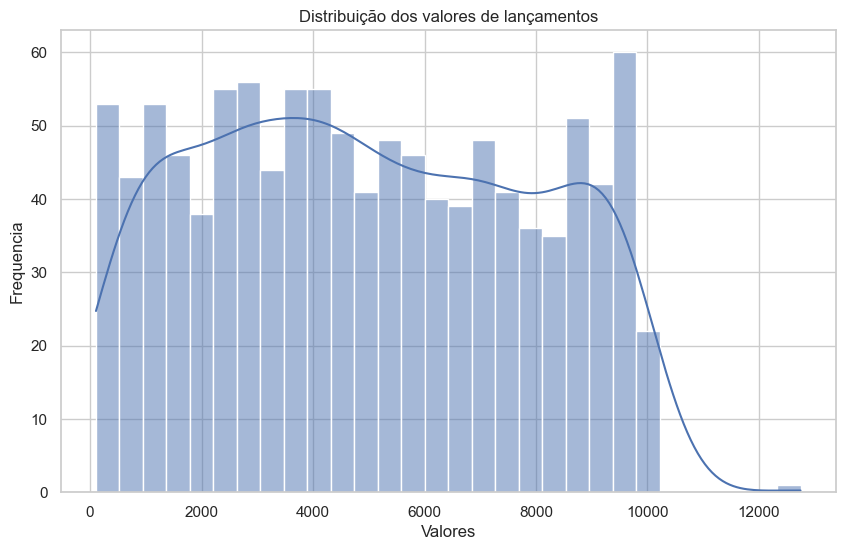

In [33]:
sns.set(style = "whitegrid")
plt.figure(figsize = (10, 6))
sns.histplot(df_filtrado_2['valor'], kde = True, bins = 30)
plt.title('Distribuição dos valores de lançamentos')
plt.xlabel('Valores')
plt.ylabel('Frequencia')
plt.show()

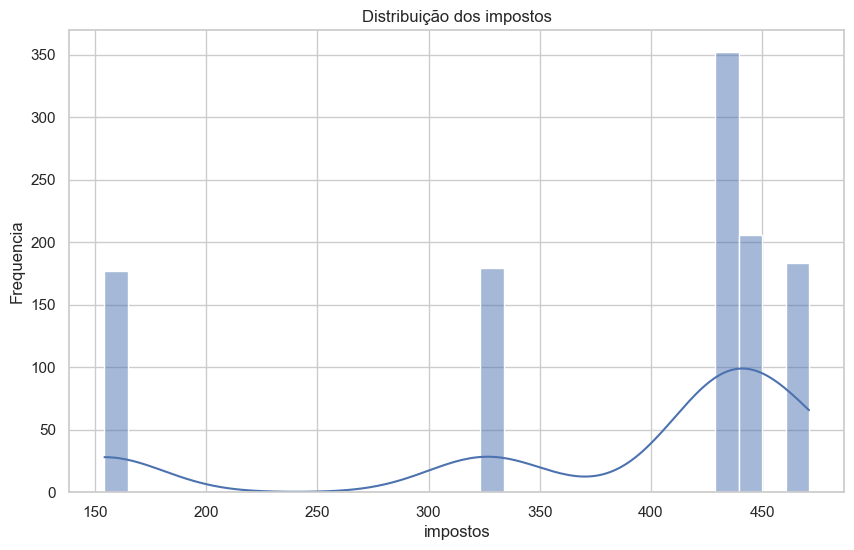

In [34]:
sns.set(style = "whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_filtrado_2['impostos'], kde = True, bins = 30)
plt.title('Distribuição dos impostos')
plt.xlabel('impostos')
plt.ylabel('Frequencia')
plt.show()

In [35]:
df_filtrado_2.to_csv("Dados monetarios filtrados.csv")